In [ ]:
# reference https://github.com/FantacherJOY/Metal-Surface-Defect-Inspection/blob/master/Surface_defects_detection.ipynb
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

#before doing these please make a folder as train data and in the train folder create another six folder for six defects
#These six folder should have 300 images.
try:
    source1 = "NEU/train"
    os.mkdir("NEU/test")
    dest11 = "NEU/test"
    files = os.listdir(source1)
    import shutil
    import numpy as np
    for f in files:
        os.mkdir(dest11 + '/'+ f)
        spilt_num=int(len(os.listdir(source1 + '/'+ f))*0.08)
        for i in os.listdir(source1 + '/'+ f)[spilt_num:]:
            shutil.move(source1 + '/'+ f +'/'+ i, dest11 + '/'+ f +'/'+ i)
except:
    print("\nEverything already have in the directory. You don't need to run this cell")
    

try:
    source1 = "NEU/test"
    os.mkdir("NEU/valid")
    dest11 = "NEU/valid"
    files = os.listdir(source1)
    import shutil
    import numpy as np
    for f in files:
        os.mkdir(dest11 + '/'+ f)
        spilt_num=int(len(os.listdir(source1 + '/'+ f))*0.5)
        for i in os.listdir(source1 + '/'+ f)[spilt_num:]:
            shutil.move(source1 + '/'+ f +'/'+ i, dest11 + '/'+ f +'/'+ i)
except:
    print("\nEverything already have in the directory. You don't need to run this cell")
    

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 10 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'NEU/train',
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

# Flow validation images in batches of 10 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        'NEU/valid',
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')
        
        
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.978 ):
            print("\nReached 97.8% accuracy so cancelling training!")
            self.model.stop_training = True
            
            
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32,
        epochs=15,
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)
        
model.save("mdlsurfdefects.h5")

import matplotlib.pyplot as plt 
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()


In [1]:
import tensorflow as tf
model = tf.keras.models.load_model('mdlsurfdefects.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 199, 199, 32)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 128)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 73728)             0

x_test ['NEU/test\\Patches\\Pa_100.bmp' 'NEU/test\\Patches\\Pa_101.bmp'
 'NEU/test\\Rolled\\RS_1.bmp' 'NEU/test\\Inclusion\\In_108.bmp'
 'NEU/test\\Patches\\Pa_104.bmp' 'NEU/test\\Rolled\\RS_101.bmp'
 'NEU/test\\Crazing\\Cr_105.bmp' 'NEU/test\\Rolled\\RS_109.bmp'
 'NEU/test\\Patches\\Pa_108.bmp' 'NEU/test\\Scratches\\Sc_109.bmp'
 'NEU/test\\Rolled\\RS_106.bmp' 'NEU/test\\Patches\\Pa_102.bmp'
 'NEU/test\\Patches\\Pa_105.bmp' 'NEU/test\\Pitted\\PS_104.bmp'
 'NEU/test\\Patches\\Pa_107.bmp' 'NEU/test\\Rolled\\RS_105.bmp'
 'NEU/test\\Scratches\\Sc_108.bmp' 'NEU/test\\Scratches\\Sc_100.bmp'
 'NEU/test\\Pitted\\PS_105.bmp' 'NEU/test\\Crazing\\Cr_102.bmp'
 'NEU/test\\Scratches\\Sc_103.bmp' 'NEU/test\\Rolled\\RS_100.bmp'
 'NEU/test\\Crazing\\Cr_100.bmp' 'NEU/test\\Pitted\\PS_102.bmp'
 'NEU/test\\Crazing\\Cr_109.bmp' 'NEU/test\\Crazing\\Cr_101.bmp'
 'NEU/test\\Rolled\\RS_104.bmp' 'NEU/test\\Pitted\\PS_107.bmp'
 'NEU/test\\Crazing\\Cr_108.bmp' 'NEU/test\\Pitted\\PS_103.bmp'
 'NEU/test\\Rolled\\RS

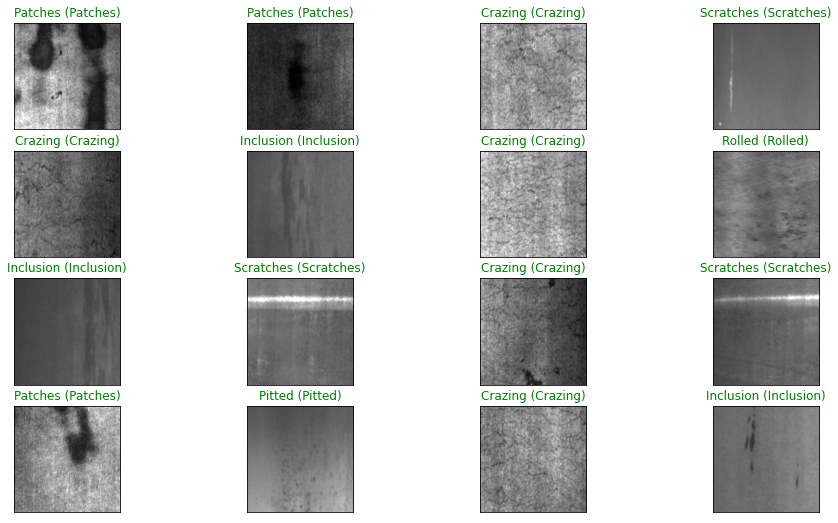

In [5]:
# First, we are going to load the file names and their respective target labels into numpy array! 
from sklearn.datasets import load_files
import numpy as np
import matplotlib.pyplot as plt 

test_dir = 'NEU/test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_test, y_test,target_labels = load_dataset(test_dir)
print('x_test',x_test, y_test,'target_labels',target_labels)

no_of_classes = len(np.unique(y_test))
no_of_classes

from keras.utils import np_utils
y_test = np_utils.to_categorical(y_test,no_of_classes)

# We just have the file names in the x set. Let's load the images and convert them into array.
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

x_test = x_test.astype('float32')/255

# Let's visualize test prediction.

y_pred = model.predict(x_test)
print('y_pred',y_pred)

# plot a raandom sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

                 

In [18]:
import tensorflow as tf
model = tf.keras.models.load_model('mdlsurfdefects.h5')
model.summary()

target_labels = ['Crazing' ,'Inclusion' ,'Patches' ,'Pitted', 'Rolled' ,'Scratches']

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = ['NEU/test\\Pitted\\PS_103.bmp','NEU/test\\Rolled\\RS_107.bmp']
x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

x_test = x_test.astype('float32')/255
y_pred = model.predict(x_test)

predictions=[]
for idx in range(x_test.shape[0]):
    pred_idx = np.argmax(y_pred[idx])
    true_pred = target_labels[pred_idx]
    predictions.append(true_pred)
    
print('predictions',predictions)    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 199, 199, 32)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 128)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 73728)             0

In [19]:
# reference https://github.com/FantacherJOY/Metal-Surface-Defect-Inspection/blob/master/Surface_defects_detection.ipynb
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt 
from keras.preprocessing.image import array_to_img, img_to_array, load_img


def setup_and_train():
    
    #before doing these please make a folder as train data and in the train folder create another six folder for six defects
    #These six folder should have 300 images.
    try:
        source1 = "NEU/train"
        os.mkdir("NEU/test")
        dest11 = "NEU/test"
        files = os.listdir(source1)
        import shutil
        import numpy as np
        for f in files:
            os.mkdir(dest11 + '/'+ f)
            spilt_num=int(len(os.listdir(source1 + '/'+ f))*0.08)
            for i in os.listdir(source1 + '/'+ f)[spilt_num:]:
                shutil.move(source1 + '/'+ f +'/'+ i, dest11 + '/'+ f +'/'+ i)
    except:
        print("\nEverything already have in the directory. You don't need to run this cell")


    try:
        source1 = "NEU/test"
        os.mkdir("NEU/valid")
        dest11 = "NEU/valid"
        files = os.listdir(source1)
        import shutil
        import numpy as np
        for f in files:
            os.mkdir(dest11 + '/'+ f)
            spilt_num=int(len(os.listdir(source1 + '/'+ f))*0.5)
            for i in os.listdir(source1 + '/'+ f)[spilt_num:]:
                shutil.move(source1 + '/'+ f +'/'+ i, dest11 + '/'+ f +'/'+ i)
    except:
        print("\nEverything already have in the directory. You don't need to run this cell")


    # All images will be rescaled by 1./255
    train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


    test_datagen = ImageDataGenerator(rescale=1./255)

    # Flow training images in batches of 10 using train_datagen generator
    train_generator = train_datagen.flow_from_directory(
            'NEU/train',
            target_size=(200, 200),
            batch_size=10,
            class_mode='categorical')

    # Flow validation images in batches of 10 using test_datagen generator
    validation_generator = test_datagen.flow_from_directory(
            'NEU/valid',
            target_size=(200, 200),
            batch_size=10,
            class_mode='categorical')


    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy') > 0.978 ):
                print("\nReached 97.8% accuracy so cancelling training!")
                self.model.stop_training = True


    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(6, activation='softmax')
    ])

    model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    print('Compiled!')

    callbacks = myCallback()
    history = model.fit(train_generator,
            batch_size = 32,
            epochs=15,
            validation_data=validation_generator,
            callbacks=[callbacks],
            verbose=1, shuffle=True)

    model.save("mdlsurfdefects.h5")

    plt.figure(1)  
    # summarize history for accuracy  
    plt.subplot(211)  
    plt.plot(history.history['accuracy'])  
    plt.plot(history.history['val_accuracy'])  
    plt.title('model accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'test'], loc='upper left')  

     # summarize history for loss  

    plt.subplot(212)  
    plt.plot(history.history['loss'])  
    plt.plot(history.history['val_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'test'], loc='upper left')  
    plt.show()    
    
def load_saved_model():
    model = tf.keras.models.load_model('mdlsurfdefects.h5')
    model.summary()
    target_labels = ['Crazing' ,'Inclusion' ,'Patches' ,'Pitted', 'Rolled' ,'Scratches']
    return model,target_labels
    
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

def predict_the_defects(files):    
    predictions=[]
    model,target_labels = load_saved_model()
    x_test = np.array(convert_image_to_array(files))
    x_test = x_test.astype('float32')/255
    y_pred = model.predict(x_test)
    for idx in range(x_test.shape[0]):
        pred_idx = np.argmax(y_pred[idx])
        true_pred = target_labels[pred_idx]
        predictions.append(true_pred)
    return predictions

predict_the_defects(['NEU/test\\Pitted\\PS_103.bmp','NEU/test\\Rolled\\RS_107.bmp'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 199, 199, 32)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 128)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 73728)             0

['Pitted', 'Rolled']

In [1]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from utils import ops as utils_ops
from utils import label_map_util
from utils import visualization_utils as vis_util
import glob

labelmap_path = os.path.join(os.getcwd(),"labelmap.pbtxt")
category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)

tf.keras.backend.clear_session()
model = tf.saved_model.load('saved_model')

def load_image_into_numpy_array(path):
    img_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(img_data))
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)
      

def run_inference_for_single_image(model, image):
    image = np.asarray(image)
    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis,...]

    # Run inference
    model_fn = model.signatures['serving_default']
    output_dict = model_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(output_dict.pop('num_detections'))
    output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
    output_dict['num_detections'] = num_detections

    # detection_classes should be ints.
    output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
    # Handle models with masks:
    if 'detection_masks' in output_dict:
        # Reframe the the bbox mask to the image size.
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                  output_dict['detection_masks'], output_dict['detection_boxes'],
                   image.shape[0], image.shape[1])      
        detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                           tf.uint8)
        output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
    return output_dict

def test_prediction():
    prediction_results=[]
    for image_path in glob.glob(os.path.join(os.getcwd(),'test_images/*.jpg')):
        image_np = load_image_into_numpy_array(image_path)
        output_dict = run_inference_for_single_image(model, image_np)
        vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          output_dict['detection_boxes'],
          output_dict['detection_classes'],
          output_dict['detection_scores'],
          category_index,
          instance_masks=output_dict.get('detection_masks_reframed', None),
          use_normalized_coordinates=True,
          line_thickness=4)
        label = output_dict['detection_classes'][np.where([f for f in output_dict['detection_scores'] if f>.5])]
        prediction_results.append({'img':image_np,'pred':[v for (k,v) in category_index.items() if k in label ]})
        break
#         display(Image.fromarray(image_np))
    return prediction_results

def predict_hard_hat(fileList):
    test_prediction()
        

In [86]:
from io import BytesIO

test_prediction()    
# for image_path in glob.glob(os.path.join(os.getcwd(),'test_images/*.jpg')):
#   image_np = load_image_into_numpy_array(image_path)
#   output_dict = run_inference_for_single_image(model, image_np)
#   vis_util.visualize_boxes_and_labels_on_image_array(
#       image_np,
#       output_dict['detection_boxes'],
#       output_dict['detection_classes'],
#       output_dict['detection_scores'],
#       category_index,
#       instance_masks=output_dict.get('detection_masks_reframed', None),
#       use_normalized_coordinates=True,
#       line_thickness=4)
#   label = output_dict['detection_classes'][np.where([f for f in output_dict['detection_scores'] if f>.5])]
#   print([v for (k,v) in category_index.items() if k in label ])
#   display(Image.fromarray(image_np))


[{'img': array([[[167, 167, 175],
          [167, 167, 175],
          [167, 167, 175],
          ...,
          [172, 171, 179],
          [173, 172, 180],
          [173, 172, 180]],
  
         [[170, 170, 178],
          [170, 170, 178],
          [170, 170, 178],
          ...,
          [172, 171, 179],
          [172, 171, 179],
          [173, 172, 180]],
  
         [[173, 173, 181],
          [173, 173, 181],
          [173, 173, 181],
          ...,
          [172, 171, 179],
          [172, 171, 179],
          [172, 171, 179]],
  
         ...,
  
         [[ 95,  82,  74],
          [ 95,  82,  73],
          [ 95,  82,  73],
          ...,
          [ 73,  72,  77],
          [ 63,  63,  73],
          [ 54,  56,  69]],
  
         [[ 96,  87,  80],
          [ 94,  85,  78],
          [ 96,  85,  79],
          ...,
          [ 75,  75,  63],
          [ 69,  69,  69],
          [ 62,  63,  68]],
  
         [[ 98,  91,  83],
          [ 97,  90,  82],
          [ 99,  

In [59]:
# print(category_index)
# tf.newaxis
d = output_dict['detection_classes'][np.where([s for s in output_dict['detection_scores'] if s>.5])]
output_dict['detection_classes']
# category_index.get([1,2])
{k:v for (k,v) in category_index.items() if k in d }
# dir(category_index)
# np.where([s for s in output_dict['detection_scores'] if s>.5])

{1: {'id': 1, 'name': 'helmet'}}

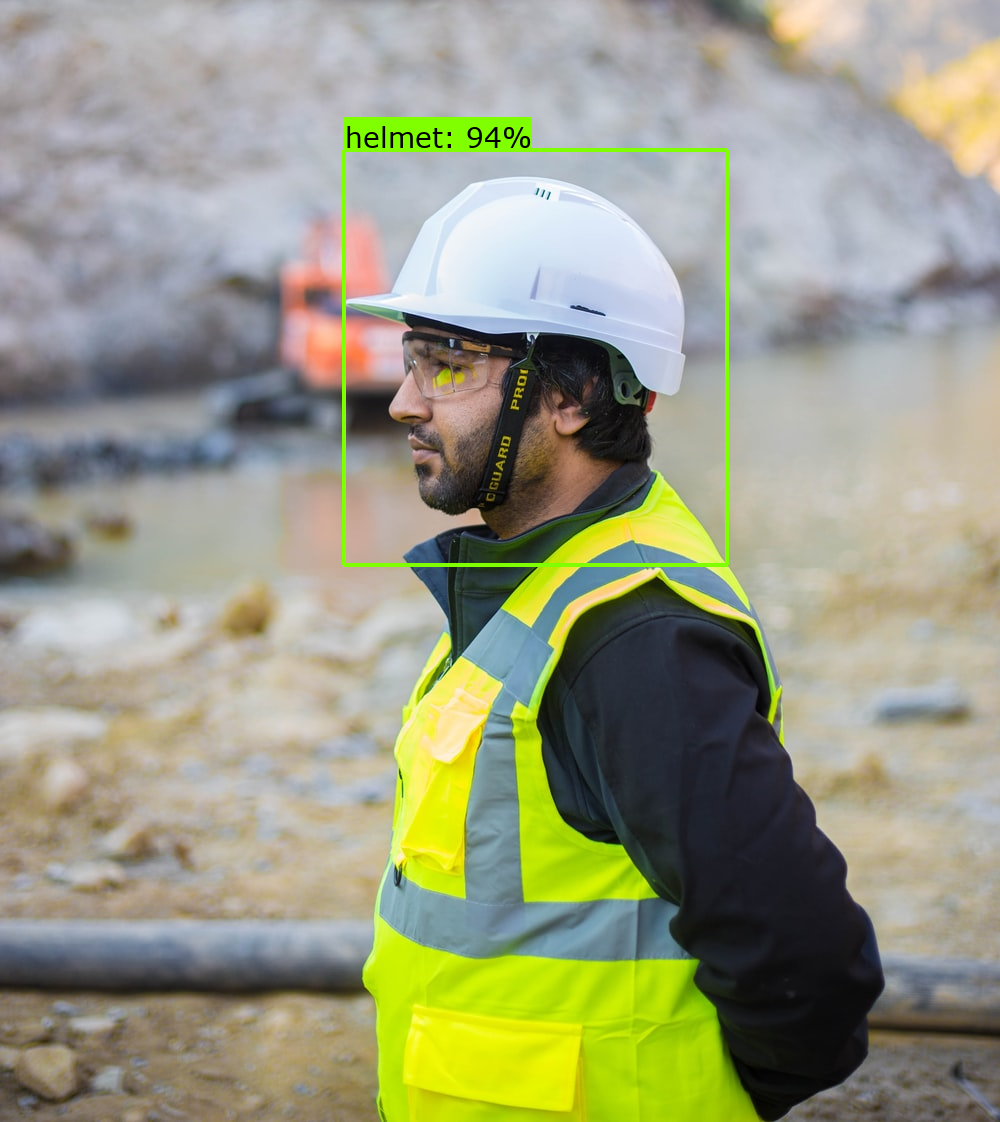

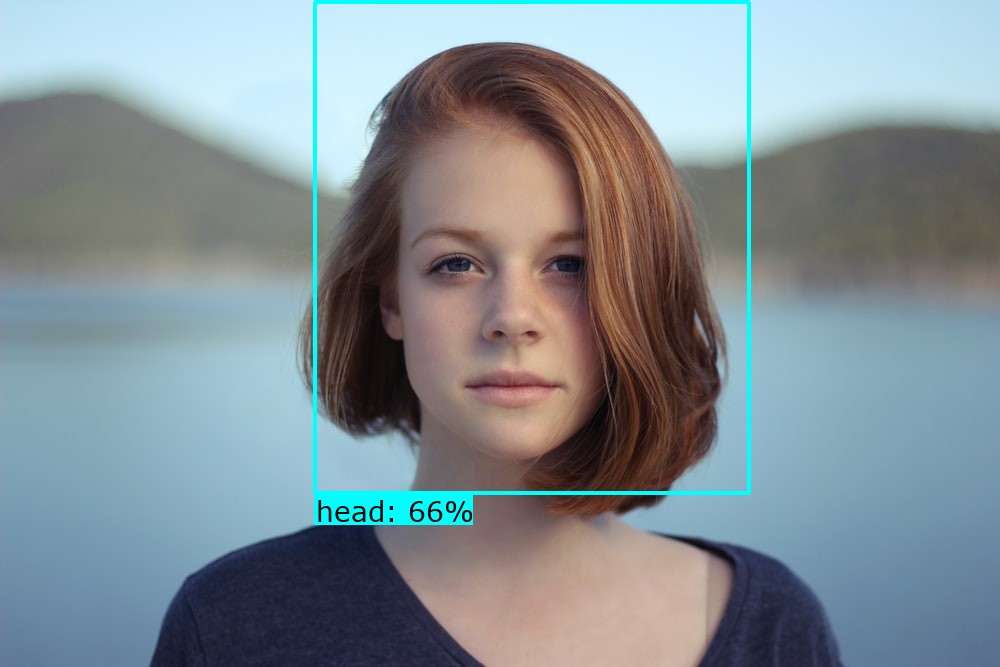

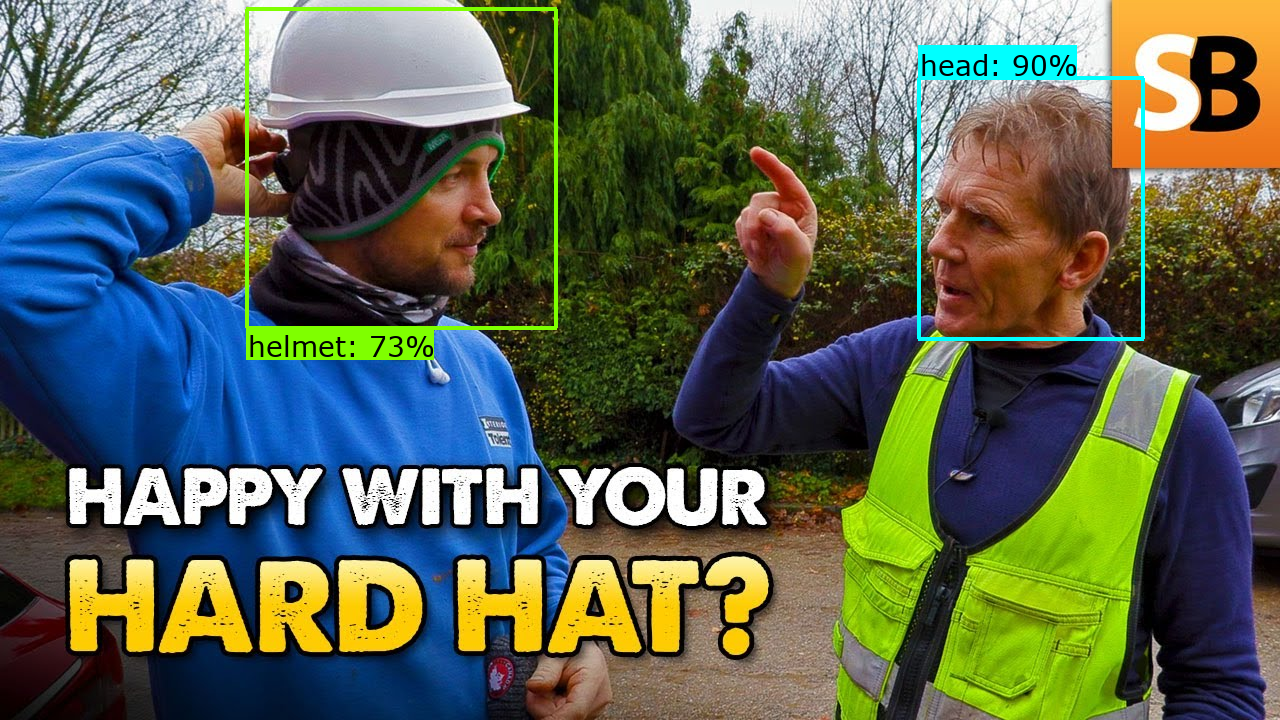

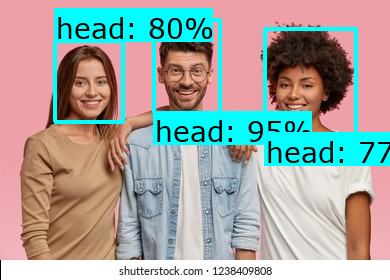

[{'img': array([[[167, 167, 175],
          [167, 167, 175],
          [167, 167, 175],
          ...,
          [172, 171, 179],
          [173, 172, 180],
          [173, 172, 180]],
  
         [[170, 170, 178],
          [170, 170, 178],
          [170, 170, 178],
          ...,
          [172, 171, 179],
          [172, 171, 179],
          [173, 172, 180]],
  
         [[173, 173, 181],
          [173, 173, 181],
          [173, 173, 181],
          ...,
          [172, 171, 179],
          [172, 171, 179],
          [172, 171, 179]],
  
         ...,
  
         [[ 95,  82,  74],
          [ 95,  82,  73],
          [ 95,  82,  73],
          ...,
          [ 73,  72,  77],
          [ 63,  63,  73],
          [ 54,  56,  69]],
  
         [[ 96,  87,  80],
          [ 94,  85,  78],
          [ 96,  85,  79],
          ...,
          [ 75,  75,  63],
          [ 69,  69,  69],
          [ 62,  63,  68]],
  
         [[ 98,  91,  83],
          [ 97,  90,  82],
          [ 99,  

In [5]:
import base64
from base64 import encodebytes
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO,BytesIO
from matplotlib import pyplot as plt
from PIL import Image
from utils import ops as utils_ops
from utils import label_map_util
from utils import visualization_utils as vis_util
import glob
import cv2
import uuid

def load_saved_model():
    tf.keras.backend.clear_session()
    model = tf.saved_model.load('saved_model')
    labelmap_path = os.path.join(os.getcwd(),"labelmap.pbtxt")
    category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)
    return model,category_index


def load_image_into_numpy_array(path):
    img_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(img_data))
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)
      

def convert_uploaded_img_to_array(files):
    images_as_array=[]
    for file in files:        
        images_as_array.append(cv2.imdecode(np.fromstring(file.read(), np.uint8), cv2.IMREAD_COLOR))
    return images_as_array


def run_inference_for_single_image(model, image):
    image = np.asarray(image)
    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis,...]

    # Run inference
    model_fn = model.signatures['serving_default']
    output_dict = model_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(output_dict.pop('num_detections'))
    output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
    output_dict['num_detections'] = num_detections

    # detection_classes should be ints.
    output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
    # Handle models with masks:
    if 'detection_masks' in output_dict:
        # Reframe the the bbox mask to the image size.
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                  output_dict['detection_masks'], output_dict['detection_boxes'],
                   image.shape[0], image.shape[1])      
        detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                           tf.uint8)
        output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
    return output_dict

def test_prediction():
    prediction_results=[]
    for image_path in glob.glob(os.path.join(os.getcwd(),'test_images/*.jpg')):
        image_np = load_image_into_numpy_array(image_path)
        output_dict = run_inference_for_single_image(model, image_np)
        vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          output_dict['detection_boxes'],
          output_dict['detection_classes'],
          output_dict['detection_scores'],
          category_index,
          instance_masks=output_dict.get('detection_masks_reframed', None),
          use_normalized_coordinates=True,
          line_thickness=4)
        label = output_dict['detection_classes'][np.where([f for f in output_dict['detection_scores'] if f>.5])]
        prediction_results.append({'img':image_np,'pred':[v for (k,v) in category_index.items() if k in label ]})
        img = Image.fromarray(image_np)
        display(img)
        filename=str(uuid.uuid4())+".jpeg"
        img.save(filename,format='jpeg')        
    return prediction_results

def predict_hard_hat_present(fileList):
    results = []
    npimg = np.array(convert_uploaded_img_to_array(fileList))   
    model,target_labels = load_saved_model()

    for idx in range(npimg.shape[0]):
        output_dict = run_inference_for_single_image(model, npimg[idx])
        vis_util.visualize_boxes_and_labels_on_image_array(
          npimg[idx],
          output_dict['detection_boxes'],
          output_dict['detection_classes'],
          output_dict['detection_scores'],
          target_labels,
          instance_masks=output_dict.get('detection_masks_reframed', None),
          use_normalized_coordinates=True,
          line_thickness=4)
        label = output_dict['detection_classes'][np.where([f for f in output_dict['detection_scores'] if f>.5])]
        results.append({'img':send_img_or_url(npimg[idx]),'pred':[v for (k,v) in target_labels.items() if k in label ]})
        #print('predictions',results)
    return {"predictions":results}


def send_img_or_url(image_np,sendUrl=True):
    img = Image.fromarray(image_np)
    if sendUrl:
        filename=str(uuid.uuid4())+".jpeg"
        img.save(filename)
        img = filename
    else:
        img_byte_arr = BytesIO()    
        img.save(img_byte_arr,format='PNG')
        img = encodebytes(img_byte_arr.getvalue()).decode('ascii')
    return img

test_prediction()

In [9]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


def load_saved_model():
    return tf.keras.models.load_model('model_package_.h5')

def predict_packaging_defects():
    img = keras.preprocessing.image.load_img("0240078925171_side.png", target_size=(224, 224))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    predictions = model.predict(img_array)
    score = predictions[0]
    print("This image is %.2f percent damaged and %.2f percent intact."% (100 * (1 - score), 100 * score))


model = load_saved_model()
model.summary()    
predict_packaging_defects()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________
This image is 18.68 percent damaged and 81.32 percent intact.


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
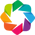

In [3]:
import pprint
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import warnings
warnings.filterwarnings('ignore')
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
import json
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend
from sklearn.metrics import confusion_matrix, classification_report
import shap
from operator import itemgetter
from keras.models import load_model


In [20]:

class CustomTraining:
    def __init__(self):
        print("*********")
        self.name = "Industrial_Casting"
        """ Step 3: Load the dataset """
        self.my_data_dir = os.path.join('D:\POC\ComputerVisionSolution\Surface_defects_detection','casting_data/')
        self.train_path = os.path.join(self.my_data_dir , 'train/')
        self.test_path = os.path.join(self.my_data_dir ,'test/')
        self.image_shape = (300,300,1) # 300 × 300、graysclaed (full-color : 3)
        self.batch_size = 32


    def data_augmentation(self):
        """ Step 4: Preprocessing (Data Augmentation) """
        img = cv2.imread(self.train_path + 'ok_front/cast_ok_0_14.jpeg')
        img_4d = img[np.newaxis]
        plt.figure(figsize=(25,10))
        generators = {"rotation":ImageDataGenerator(rotation_range=180), 
                      "zoom":ImageDataGenerator(zoom_range=0.7), 
                      "brightness":ImageDataGenerator(brightness_range=[0.2,1.0]), 
                      "height_shift":ImageDataGenerator(height_shift_range=0.7), 
                      "width_shift":ImageDataGenerator(width_shift_range=0.7)}

        plt.subplot(1, 6, 1)
        plt.title("Original", weight='bold', size=15)
        plt.imshow(img)
        plt.axis('off')
        cnt = 2
        for param, generator in generators.items():
            image_gen = generator
            gen = image_gen.flow(img_4d, batch_size=1)
            batches = next(gen)
            g_img = batches[0].astype(np.uint8)
            plt.subplot(1, 6, cnt)
            plt.title(param, weight='bold', size=15)
            plt.imshow(g_img)
            plt.axis('off')
            cnt += 1
        plt.show()

        """ Step 5: Execute Data Augmentation """
        image_gen = ImageDataGenerator(rescale=1/255, zoom_range=0.1, brightness_range=[0.9,1.0])

        self.train_set = image_gen.flow_from_directory(self.train_path,
                                                    target_size=self.image_shape[:2],
                                                    color_mode="grayscale",
                                                    classes={'def_front': 0, 'ok_front': 1},
                                                    batch_size=self.batch_size,
                                                    class_mode='binary',
                                                    shuffle=True,
                                                    seed=0)

        self.test_set = image_gen.flow_from_directory(self.test_path,
                                                   target_size=self.image_shape[:2],
                                                   color_mode="grayscale",
                                                   classes={'def_front': 0, 'ok_front': 1},
                                                   batch_size=self.batch_size,
                                                   class_mode='binary',
                                                   shuffle=False,
                                                   seed=0)
        self.train_set.class_indices

        
    """ Step 6: Modelling, Build Model, Model Training """
    def model_training(self):
        self.data_augmentation()
        backend.clear_session()
        self.model = Sequential()
        self.model.add(Conv2D(filters=16, kernel_size=(7,7), strides=2, input_shape=self.image_shape, activation='relu', padding='same'))
        self.model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
        self.model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, input_shape=self.image_shape, activation='relu', padding='same'))
        self.model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
        self.model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, input_shape=self.image_shape, activation='relu', padding='same'))
        self.model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
        self.model.add(Flatten())
        self.model.add(Dense(units=224, activation='relu'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(units=1, activation='sigmoid'))
        self.model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])
        self.model.summary()

        #plot_model(self.model, show_shapes=True, expand_nested=True, dpi=60)
        """ Build Model """
        model_save_path = modelFileMetalCastDefect
        early_stop = EarlyStopping(monitor='val_loss',patience=2)
        checkpoint = ModelCheckpoint(filepath=model_save_path, verbose=1, save_best_only=True, monitor='val_loss')
        """ Model Training """
        n_epochs = 20
        results = self.model.fit_generator(self.train_set, epochs=n_epochs, validation_data=self.test_set, callbacks=[early_stop,checkpoint])

        self.model_history = results.history
        json.dump(self.model_history, open('model_history.json', 'w'))

        
    """ Step 7: Model Performance """
    def model_perfomance(self):
        losses = pd.DataFrame(self.model_history)
        losses.index = map(lambda x : x+1, losses.index)
        losses.head(3)

        g = hv.Curve(losses.loss, label='Training Loss') * hv.Curve(losses.val_loss, label='Validation Loss') \
    * hv.Curve(losses.accuracy, label='Training Accuracy') * hv.Curve(losses.val_accuracy, label='Validation Accuracy')
        g.opts(opts.Curve(xlabel="Epochs", ylabel="Loss / Accuracy", width=700, height=400,tools=['hover'],show_grid=True,title='Model Evaluation')).opts(legend_position='bottom')

        pred_probability = self.model.predict_generator(self.test_set)
        predictions = pred_probability > 0.5

        plt.figure(figsize=(10,6))
        plt.title("Confusion Matrix", size=20, weight='bold')
        sns.heatmap(
            confusion_matrix(self.test_set.classes, predictions),
            annot=True,
            annot_kws={'size':14, 'weight':'bold'},
            fmt='d',
            xticklabels=['Defect', 'OK'],
            yticklabels=['Defect', 'OK'])
        plt.tick_params(axis='both', labelsize=14)
        plt.ylabel('Actual', size=14, weight='bold')
        plt.xlabel('Predicted', size=14, weight='bold')
        plt.show()
        print(classification_report(self.test_set.classes, predictions, digits=3))
        

In [22]:
model_dir = os.path.join(os.getcwd(),"model_files")
modelFileMetalCastDefect = os.path.join(model_dir,'casting_product_detection.hdf5')


*********


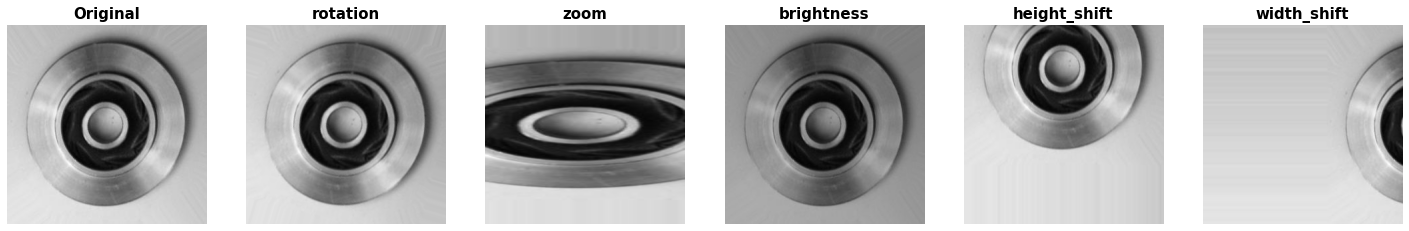

Found 1059 images belonging to 2 classes.
Found 715 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      800       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_______________________________________

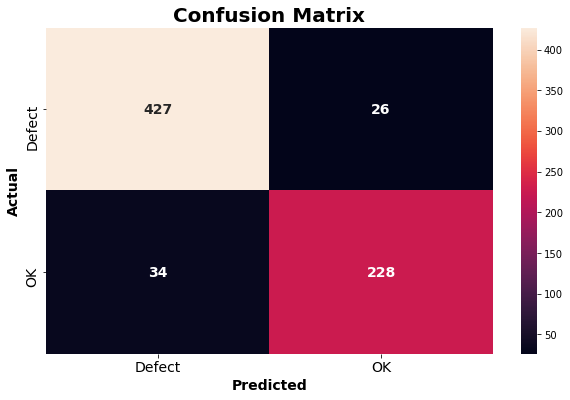

              precision    recall  f1-score   support

           0      0.926     0.943     0.934       453
           1      0.898     0.870     0.884       262

    accuracy                          0.916       715
   macro avg      0.912     0.906     0.909       715
weighted avg      0.916     0.916     0.916       715



In [24]:
trainingObj = CustomTraining()
trainingObj.model_training()
trainingObj.model_perfomance()
